In [6]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import alphashape
from shapely.geometry import Point, Polygon
import os


In [5]:
def is_point_inside_polygon(point, polygon):
    return polygon.contains(Point(point[0], point[1]))

[[141.343   92.6816]
 [144.238   91.8672]
 [143.352   89.8844]
 [140.469   90.9137]
 [141.343   92.6816]]


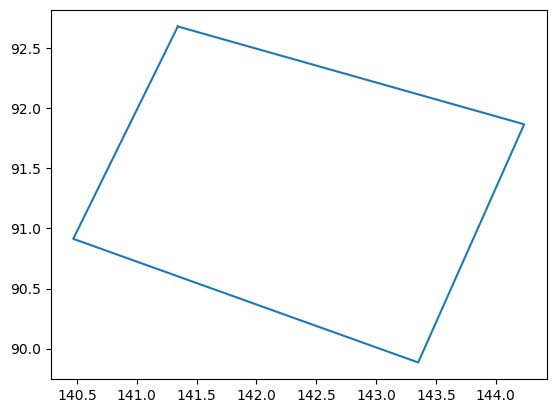

In [8]:
pcd = o3d.io.read_point_cloud(os.path.join("milestone1","obst_Vertices_1.ply"))
vertices = np.asarray(pcd.points)[:,:2] 
print(vertices)

plt.plot(vertices[:,0], vertices[:,1])
plt.show()

In [9]:

polygon = Polygon(vertices)
test_point = [140.9, 91.0]
print(is_point_inside_polygon(test_point, polygon))

True


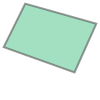

In [10]:
polygon

In [11]:
class PolygonMap:
    def __init__(self, boundary_ply, obstacle_ply_list):
        self.boundary = self.load_polygon(boundary_ply)
        self.obstacles = [self.load_polygon(ply) for ply in obstacle_ply_list]

    def load_polygon(self, ply_file):
        pcd = o3d.io.read_point_cloud(ply_file)
        vertices = np.asarray(pcd.points)[:, :2] 
        return Polygon(vertices)

    def is_valid_robot_pos(self, robot_polygon):

        robot_shape = Polygon(robot_polygon)

        if not robot_shape.within(self.boundary):
            return False, "Robot is outside the boundary"

        for obs in self.obstacles:
            if robot_shape.intersects(obs):
                return False, "Robot collides with an obstacle"

        return True, "Robot is in free space"

    def visualize(self, robot_polygon=None):
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot boundary
        bx, by = self.boundary.exterior.xy
        ax.plot(bx, by, 'b-', linewidth=2, label="Boundary")
        ax.fill(bx, by, 'cyan', alpha=0.2)

        # Plot obstacles
        for i, obs in enumerate(self.obstacles):
            ox, oy = obs.exterior.xy
            ax.plot(ox, oy, 'r-', linewidth=2)
            ax.fill(ox, oy, 'red', alpha=0.4)

        # Plot robot polygon
        if robot_polygon:
            rx, ry = zip(*robot_polygon) 
            ax.plot(rx + (rx[0],), ry + (ry[0],), 'g-', linewidth=2, label="Robot")  
            ax.fill(rx, ry, 'green', alpha=0.5)

        ax.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Polygon Map with Obstacles and Robot")
        plt.grid(True)
        plt.show()


In [12]:
folder = "milestone1"
boundary_file = os.path.join(folder, "milestone1_vertices.ply")
obstacle_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.startswith("obst")]
polygon_map = PolygonMap(boundary_file, obstacle_files)


(False, 'Robot collides with an obstacle')


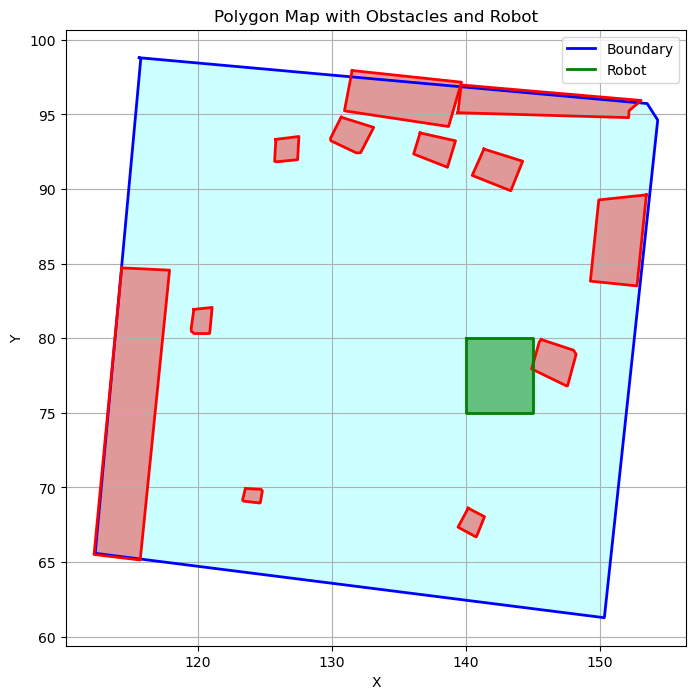

In [13]:

robot_footprint = [(140, 80), (145, 80), (145, 75), (140, 75)] 
print( polygon_map.is_valid_robot_pos(robot_footprint))
polygon_map.visualize(robot_footprint)



In [16]:

class PolygonMap:
    def __init__(self, boundary_ply, obstacle_ply_list):
        self.boundary = self.load_polygon(boundary_ply)
        self.obstacles = [self.load_polygon(ply) for ply in obstacle_ply_list]

    def load_polygon(self, ply_file):
        pcd = o3d.io.read_point_cloud(ply_file)
        vertices = np.asarray(pcd.points)[:, :2] 
        return Polygon(vertices)

    def is_valid_robot_pos(self, center, length, width):
    
        robot_polygon = self.get_robot_polygon(center, length, width)
        robot_shape = Polygon(robot_polygon)

        if not robot_shape.within(self.boundary):
            return False, "Robot is outside the boundary"

        for obs in self.obstacles:
            if robot_shape.intersects(obs):
                return False, "Robot collides with an obstacle"

        return True, "Robot is in free space"

    def get_robot_polygon(self, center, length, width):

        cx, cy = center
        half_length = length / 2
        half_width = width / 2

        return [
            (cx - half_length, cy - half_width),  
            (cx + half_length, cy - half_width),  
            (cx + half_length, cy + half_width), 
            (cx - half_length, cy + half_width)  
        ]

    def visualize(self, center=None, length=None, width=None):
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot boundary
        bx, by = self.boundary.exterior.xy
        ax.plot(bx, by, 'b-', linewidth=2, label="Boundary")
        ax.fill(bx, by, 'cyan', alpha=0.2)

        # Plot obstacles
        for i, obs in enumerate(self.obstacles):
            ox, oy = obs.exterior.xy
            ax.plot(ox, oy, 'r-', linewidth=2)
            ax.fill(ox, oy, 'red', alpha=0.4)

        # Plot robot polygon
        if center and length and width:
            robot_polygon = self.get_robot_polygon(center, length, width)
            rx, ry = zip(*robot_polygon) 
            ax.plot(rx + (rx[0],), ry + (ry[0],), 'g-', linewidth=2, label="Robot")  
            ax.fill(rx, ry, 'green', alpha=0.5)

        ax.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Polygon Map with Obstacles and Robot")
        plt.grid(True)
        plt.show()


Robot is in free space


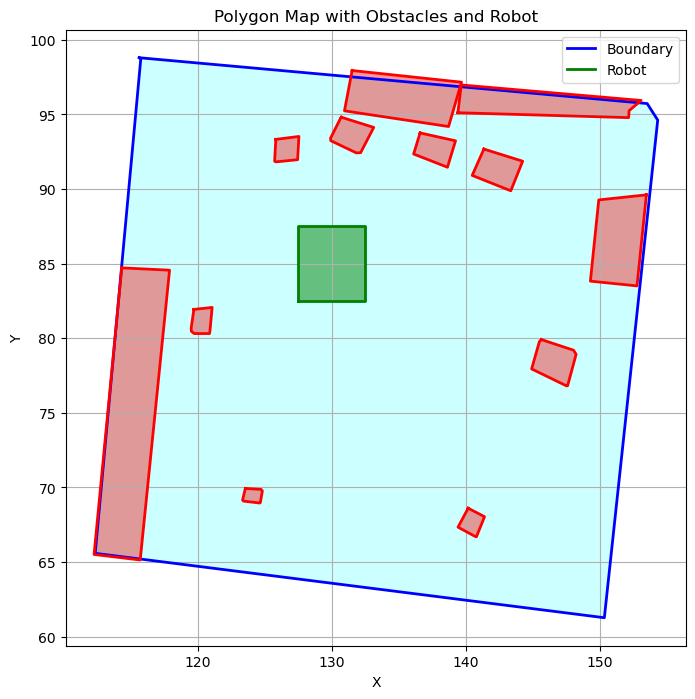

In [18]:

polygon_map = PolygonMap(boundary_file, obstacle_files)
car_center = (130, 85)  
car_length = 5  
car_width = 5 

valid, message = polygon_map.is_valid_robot_pos(car_center, car_length, car_width)
print(message)

# Visualize with the car
polygon_map.visualize(car_center, car_length, car_width)
